# Weather_Classification

## Import Library

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import MaxPooling2D,Conv2D,Dense,Flatten
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
import splitfolders

## Data Preparation

In [3]:
input_dir='D:\\DATA Science\\DEEP LEARNING\\CNN\\weather classification\\Dataset\\Multi-class Weather Dataset'
output_dir='D:\\DATA Science\\DEEP LEARNING\\CNN\\weather classification\\Dataset\\Multi-class Weather Dataset_split'

In [27]:
#splitfolders.ratio(input=input_dir,output=output_dir,ratio=(0.8,0.1,0.1))

In [5]:
Data_gen=ImageDataGenerator(rescale=1/255)

In [6]:
train_dir='D:\\DATA Science\\DEEP LEARNING\\CNN\\weather classification\\Dataset\\Multi-class Weather Dataset_split\\train'
test_dir='D:\\DATA Science\\DEEP LEARNING\\CNN\\weather classification\\Dataset\\Multi-class Weather Dataset_split\\test'
val_dir='D:\\DATA Science\\DEEP LEARNING\\CNN\\weather classification\\Dataset\\Multi-class Weather Dataset_split\\val'

In [7]:
train_itt=Data_gen.flow_from_directory(directory=train_dir,batch_size=64,target_size=(100, 100))
test_itt=Data_gen.flow_from_directory(directory=test_dir,batch_size=64,target_size=(100, 100))
val_itt=Data_gen.flow_from_directory(directory=val_dir,batch_size=64,target_size=(100, 100))

Found 899 images belonging to 4 classes.
Found 115 images belonging to 4 classes.
Found 111 images belonging to 4 classes.


## Model

In [9]:
model= Sequential()

In [10]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
early_stop= EarlyStopping(monitor='val_loss',patience=15,mode='min',verbose=False)

In [22]:
model.fit(train_itt,validation_data=val_itt,epochs=50,callbacks=early_stop)

Epoch 1/50
15/15 [==============================] - 18s 1s/step - loss: 0.1394 - accuracy: 0.9444 - val_loss: 0.3506 - val_accuracy: 0.8919
Epoch 2/50
15/15 [==============================] - 19s 1s/step - loss: 0.2199 - accuracy: 0.9232 - val_loss: 0.5255 - val_accuracy: 0.8739
Epoch 3/50
15/15 [==============================] - 18s 1s/step - loss: 0.1585 - accuracy: 0.9444 - val_loss: 0.4875 - val_accuracy: 0.8559
Epoch 4/50
15/15 [==============================] - 19s 1s/step - loss: 0.0848 - accuracy: 0.9800 - val_loss: 0.3269 - val_accuracy: 0.9099
Epoch 5/50
15/15 [==============================] - 18s 1s/step - loss: 0.0533 - accuracy: 0.9833 - val_loss: 0.5412 - val_accuracy: 0.8198
Epoch 6/50
15/15 [==============================] - 18s 1s/step - loss: 0.0378 - accuracy: 0.9900 - val_loss: 0.4906 - val_accuracy: 0.8919
Epoch 7/50
15/15 [==============================] - 16s 1s/step - loss: 0.0291 - accuracy: 0.9967 - val_loss: 0.5205 - val_accuracy: 0.8829
Epoch 8/50
15/15 [==

In [23]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

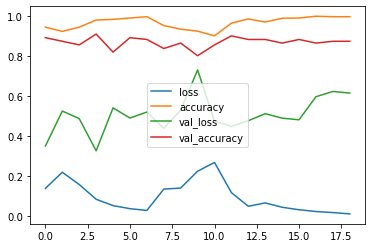

In [24]:
losses.plot()

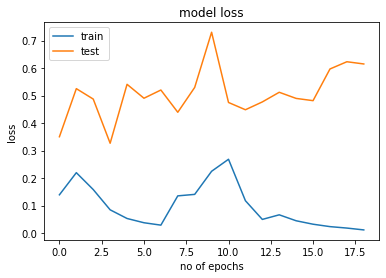

In [25]:
plt.plot(losses['loss'])
plt.plot(losses['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

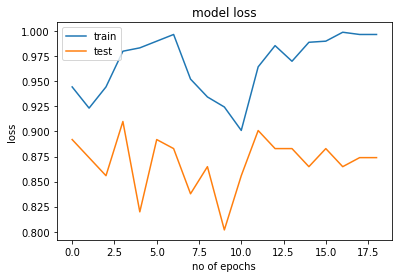

In [26]:
plt.plot(losses['accuracy'])
plt.plot(losses['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [19]:
model.save('weather_classification_model.h5')

In [20]:
class_label= test_itt.class_indices
class_label

{'Cloudy': 0, 'Rain': 1, 'Shine': 2, 'Sunrise': 3}